# Aula 04 - Exercício 03
## PCA e Regressão Polinomial Multivariada
### Alunos:
 - Alexandre Batistella Bellas, 9763168
 - Moisés Botarro Ferraz Silva, 8504135

# PCA
 O conjunto Iris consiste na medida de 4 características de plantas e seus respectivos tipos. Embora não é possível visualizar o conjunto de 4 dimensões, podemos utilizar a técnica PCA para reduzir a dimensionalidade do conjunto para 2 ou 3 dimensões.
- Utilize a técnica PCA para visualizar em duas dimensões o conjunto Iris, já carregado abaixo. 
Lembre-se que os dados devem estar normalizados e centrados na média antes de aplicar o PCA.
  - Dica: Utilize a classe StandardScaler para pré-processar os dados

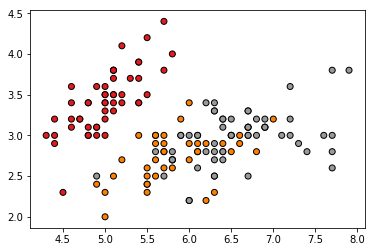

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target
#####

def normalize(x):
    scaler = StandardScaler(with_mean=True, with_std=True)
    scaler.fit(x)
    return scaler.transform(x)

#####
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')

In [5]:
# Pré Processamento

# Normalização dos Dados
def normalize(x):
    scaler = StandardScaler(with_mean=True, with_std=True)
    scaler.fit(x)
    return scaler.transform(x)

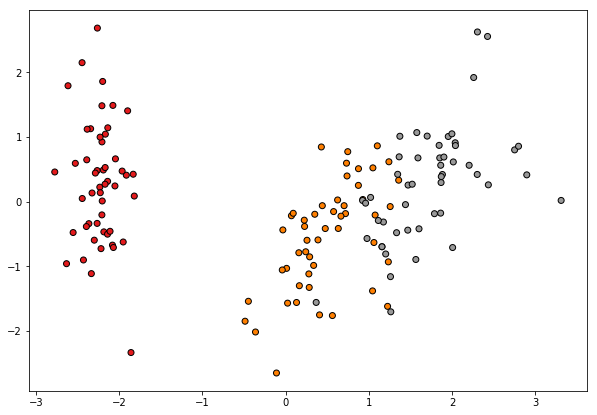

In [6]:
# Decomposição em Componentes Principais
def getPCA(x, n_components):
    x_norm = normalize(x)
    pca = PCA(n_components=n_components)
    pca.fit(x_norm)
    principal_components = pca.transform(x_norm)
    return principal_components, pca

principal_components, pca = getPCA(x, 2)
plt.figure(figsize=(10,7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')



---

- Mostre a variância e a porcentagem da variância que é expressa por cada componente principal.
  - Dica: Utilize as variáveis `explained_variance_`  e `explained_variance_ratio_`  da classe PCA. 

In [7]:
print("Variância das componentes principais: %s" % pca.explained_variance_)
print("Porcentagem da variância das componentes principais: %s" % pca.explained_variance_ratio_)

print("Soma das porcentagems das variâncias das componentes principais: %.4f" % sum(pca.explained_variance_ratio_))

Variância das componentes principais: [2.93808505 0.9201649 ]
Porcentagem da variância das componentes principais: [0.72962445 0.22850762]
Soma das porcentagems das variâncias das componentes principais: 0.9581


A variância das componentes principais é dada pelos auto valores da matriz de covariância das componentes originais. A variância é uma medida da quantidade de informação que conseguiremos representar utilizando cada uma das novas componentes.

Para trabalhar com métricas normalizadas, utilizamos a porcentagem da variância das componentes principais. Pelos valores obtidos, vemos que a primeira componente principal consegue representar 72,96% da informação dos dados originais e a segunda componente, 22,85%.

Dessa forma, utilizando apenas as duas componentes resultantes da PCA, conseguimos representar 95,81% da informação original.



---



Para os próximos exercícios utilizaremos a base de dados 'Boston House Prices'.  Os dados possuem dimensionalidade 10, e são distribuidos em 442 exemplos. O pré-carregamento da base já foi feito abaixo.

- Aplique PCA para reduzir a dimensionalidade para 3. Lembre-se de centralizar e normalizar os dados antes de aplicar o PCA

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Boston
data = datasets.load_boston()
x = data.data
y = data.target

# PCA
pc_3, pca3 = getPCA(x, n_components=3)
print("Dados na nova base\n%s\n\n" % pc_3)

print("Variância das componentes principais: %s" % pca3.explained_variance_)
print("Porcentagem da variância das componentes principais: %s" % pca3.explained_variance_ratio_)
print("Soma das porcentagems das variâncias das componentes principais: %.4f" % sum(pca3.explained_variance_ratio_))

Dados na nova base
[[-2.09829747  0.77311275  0.34294273]
 [-1.45725167  0.59198521 -0.69519931]
 [-2.07459756  0.5996394   0.1671216 ]
 ...
 [-0.31236047  1.15524644 -0.40859759]
 [-0.27051907  1.04136158 -0.58545406]
 [-0.12580322  0.76197805 -1.294882  ]]


Variância das componentes principais: [6.1389812  1.43611329 1.2450773 ]
Porcentagem da variância das componentes principais: [0.47129606 0.11025193 0.0955859 ]
Soma das porcentagems das variâncias das componentes principais: 0.6771




---

- Novamente, aplique o algoritmo de PCA para reduzir o número de variáveis do conjunto original para 4.

In [10]:
pc_4, pca4 = getPCA(x, n_components=4)
print("Dados na nova base\n%s\n\n" % pc_4)

print("Variância das componentes principais: %s" % pca4.explained_variance_)
print("Porcentagem da variância das componentes principais: %s" % pca4.explained_variance_ratio_)
print("Soma das porcentagems das variâncias das componentes principais: %.4f" % sum(pca4.explained_variance_ratio_))

Dados na nova base
[[-2.09829747  0.77311275  0.34294273 -0.89177403]
 [-1.45725167  0.59198521 -0.69519931 -0.48745853]
 [-2.07459756  0.5996394   0.1671216  -0.73920419]
 ...
 [-0.31236047  1.15524644 -0.40859759 -0.78630409]
 [-0.27051907  1.04136158 -0.58545406 -0.67813391]
 [-0.12580322  0.76197805 -1.294882   -0.2883292 ]]


Variância das componentes principais: [6.1389812  1.43611329 1.2450773  0.85927328]
Porcentagem da variância das componentes principais: [0.47129606 0.11025193 0.0955859  0.06596732]
Soma das porcentagems das variâncias das componentes principais: 0.7431




---

- Faça regressão utilizando uma reta no conjunto com dimensão 3 e calcule seu score R2, MAE e MSE.

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def getLinearRegression(x, y, fit_intercept=True):
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(x, y)

    print("model coeficients: %s" % model.coef_.round(2))
    
    y_predicted = model.predict(x)
    
    r2 = r2_score(y, y_predicted)
    print("R2: %f" % r2)
    
    mae = mean_absolute_error(y, y_predicted)
    print("MAE: %f" % mae)

    mse = mean_squared_error(y, y_predicted)
    print("MSE: %f" % mse)

    return model

lr_3 = getLinearRegression(pc_3, y)

model coeficients: [-2.27  2.19  3.5 ]
R2: 0.635924
MAE: 3.831159
MSE: 30.735145




---

- Agora faça regressão utilizando uma reta com os dados de dimensionalidade 4 e calcule seu score R2, MAE e MSE.

In [12]:
lr_4 = getLinearRegression(pc_4, y)

model coeficients: [-2.27  2.19  3.5  -1.08]
R2: 0.647764
MAE: 3.736626
MSE: 29.735582




---

- Utilizando uma função quadrática, faça regressão utilizando as 3 variáveis mais relevantes e calcule seu score R2, MAE e MSE.

In [13]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(degree=2)
p.fit(pc_3)
pc_3_transform = p.transform(pc_3)

lr_3_2dim = getLinearRegression(pc_3_transform, y, fit_intercept=False)

model coeficients: [24.59 -1.89  0.68  4.27 -0.31 -0.34 -0.74 -0.32  0.46  0.27]
R2: 0.703579
MAE: 3.321097
MSE: 25.023763




---

- Por fim, faça regressão no conjunto de dimensão 4 utilizando uma função quadrática. Calcule seu score R2, MAE e MSE e compare com os modelos gerados anteriormente.


In [14]:
p = PolynomialFeatures(degree=2)
p.fit(pc_4)
pc_4_transform = p.transform(pc_4)

lr_4_2dim = getLinearRegression(pc_4_transform, y, fit_intercept=False)

model coeficients: [24.45 -1.97  1.    4.52  1.06 -0.35 -0.36 -0.66  0.85 -0.22  0.09 -1.11
  0.33  0.04  0.13]
R2: 0.746518
MAE: 3.055518
MSE: 21.398864


O coeficiente R2 mede a porcentagem da variância dos dados originais que o nosso modelo consegue representar. Portanto, ele nos dá uma medida da qualidade do modelo. Buscamos treinar modelos cujo R2 resultante seja o mais próximo possível de 1.

Analisando as regressões lineares anteriores, observamos que houve uma melhora no valor de R2 ao aumentarmos o número de componentes pricipais e, em seguida, o grau da função utilizada. Por fim, o melhor modelo obtido foi o que utilizou os dados no espaço de 4 componentes principais, aproximando a variável dependente por uma função quadrática. Seu score (0.7465) foi o maior dos modelos treinados.

Além disso, observamos uma leve diminuição no valor do MAE (de 3.83 à 3.06) e uma diminuição razoável no valor de MSE (de 30.73 à 21.39). Este último indica que os pontos preditos pelo modelo se aproximaram dos pontos originais.